In [1]:
#!pip install --upgrade oct2py
import numpy as np
from oct2py import octave
import matplotlib.pyplot as plt
import os
from scipy.optimize import root
import pickle
import scipy.io
import numpy as np

In [2]:
with open('t_call_permanent_shock.m', 'w') as file:
    file.write("perfect_foresight_setup(periods=400,endval_steady);\n")
    file.write("perfect_foresight_solver(print);\n")
    

    

In [3]:
from oct2py import octave
import numpy as np

# Set up Octave session
oct = octave

# Add Dynare to Octave's path
oct.addpath('C:/dynare/6.1/matlab')  # Adjust this path as necessary



    _pyeval at line 57 column 30

    _pyeval at line 57 column 30



'.;C:\\Users\\blankenw\\AppData\\Local\\anaconda3\\Lib\\site-packages\\oct2py;C:\\Users\\blankenw\\AppData\\Local\\anaconda3\\Lib\\site-packages\\octave_kernel;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\lib\\octave\\9.1.0\\site\\oct\\x86_64-w64-mingw32;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\lib\\octave\\site\\oct\\api-v59\\x86_64-w64-mingw32;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\lib\\octave\\site\\oct\\x86_64-w64-mingw32;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\9.1.0\\site\\m;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\site\\api-v59\\m;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\site\\m;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\site\\m\\once_only;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\share\\octave\\site\\m\\startup;C:\\Program Files\\GNU Octave\\Octave-9.1.0\\mingw64\\lib\\octave\\9.1.0\\oct\\x86_64-w64-mingw32;C:\\Program Fi

In [6]:
oct.dynare('model_simple_example.mod')
# Check if perfect_foresight_solver has run
# Run Dynare


# Check the contents of oo_
oct.eval("disp('Fields in oo_:')")
oct.eval("disp(fieldnames(oo_))")

# Pull the entire oo_ structure
oo_ = oct.pull('oo_')

# Print all top-level fields in oo_
print("Fields in oo_ (from Python):")
for field in oo_:
    print(field)

Starting Dynare (version 6.1).
Calling Dynare with arguments: none
Starting preprocessing of the model file ...
Substitution of exo leads: added 1 auxiliary variables and equations.
Found 3 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 2 equation(s)
                                 and 2 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 2 equation(s)
                                 and 2 feedback variable(s).
Preprocessing completed.
Preprocessing time: 0h00m00s.

STEADY-STATE RESULTS:

c               		 1.53061
k               

In [7]:
# Check if endo_simul exists and its size
oct.eval("if isfield(oo_, 'endo_simul'), disp(size(oo_.endo_simul)), else, disp('endo_simul not found'), end")

# Check if g exists (sometimes used for policy functions)
oct.eval("if isfield(oo_, 'g'), disp('g found'), else, disp('g not found'), end")

# Check if dr exists (sometimes used for decision rules)
oct.eval("if isfield(oo_, 'dr'), disp('dr found'), else, disp('dr not found'), end")

# Check if steady_state exists
oct.eval("if isfield(oo_, 'steady_state'), disp('steady_state found'), else, disp('steady_state not found'), end")

     3   202
g not found
dr found
steady_state found


In [8]:
# Pull M_ to get variable names
M_ = oct.pull('M_')

# Get endogenous variable names
endo_names = [name[0] for name in M_['endo_names']]

# Try to access oo_.endo_simul
endo_simul = oct.pull('oo_.endo_simul')

if endo_simul.size > 0:
    results = {name: endo_simul[i, :] for i, name in enumerate(endo_names)}
    
    print("Simulation results:")
    for name, values in results.items():
        print(f"{name}: {values[:5]}")  # Print first 5 values for each variable
else:
    print("oo_.endo_simul is empty")

AttributeError: 'oo_.endo_simul' object has no attribute 'size'

In [10]:
from oct2py import octave
import numpy as np

# Set up Octave session
oct = octave

# Add Dynare to Octave's path and run your model


oct.dynare('model_simple_example.mod')

# Pull the entire oo_ structure
oo_ = oct.pull('oo_')

# Check the type and content of oo_.endo_simul
print("Type of oo_.endo_simul:", type(oo_['endo_simul']))
print("Content of oo_.endo_simul:", oo_['endo_simul'])

# Pull M_ to get variable names
M_ = oct.pull('M_')
endo_names = [name[0] for name in M_['endo_names']]

# Function to safely get the shape of an object
def safe_shape(obj):
    if hasattr(obj, 'shape'):
        return obj.shape
    elif isinstance(obj, list):
        return (len(obj),)
    else:
        return None

# Try to access and process oo_.endo_simul
endo_simul = oo_['endo_simul']
endo_shape = safe_shape(endo_simul)

print("Shape of endo_simul:", endo_shape)

if endo_shape:
    if len(endo_shape) == 2:  # If it's a 2D array
        results = {name: endo_simul[i, :] for i, name in enumerate(endo_names)}
    elif len(endo_shape) == 1:  # If it's a 1D array
        results = {name: endo_simul for name in endo_names}
    else:
        print("Unexpected shape for endo_simul")
        results = {}
    
    print("\nSimulation results:")
    for name, values in results.items():
        if isinstance(values, (list, np.ndarray)):
            print(f"{name}: {values[:5]}")  # Print first 5 values
        else:
            print(f"{name}: {values}")
else:
    print("Unable to process oo_.endo_simul")

# Check for other potential result storage locations
for field in ['g', 'dr', 'steady_state', 'path']:
    if field in oo_:
        print(f"\nFound {field} in oo_:")
        print(type(oo_[field]))
        print(oo_[field])

Starting Dynare (version 6.1).
Calling Dynare with arguments: none
Starting preprocessing of the model file ...
Substitution of exo leads: added 1 auxiliary variables and equations.
Found 3 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 2 equation(s)
                                 and 2 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 2 equation(s)
                                 and 2 feedback variable(s).
Preprocessing completed.
Preprocessing time: 0h00m00s.

STEADY-STATE RESULTS:

c               		 1.53061
k               

In [ ]:
solution

In [ ]:
oo_

Makes a call to Octave, which makes a call to Dynare. Then the `.mod` file is run in Dynare. Output from Dynare is displayed as it runs.

In [ ]:
y=1
x=octave.call_dynare_simple_example(y,nout=1)
oo = octave.pull('oo_') 

In [ ]:
oo

Starting Dynare (version 6.1).
Calling Dynare with arguments: none
Starting preprocessing of the model file ...
Substitution of exo leads: added 1 auxiliary variables and equations.
Found 3 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 2 equation(s)
                                 and 2 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 2 equation(s)
                                 and 2 feedback variable(s).
Preprocessing completed.
Preprocessing time: 0h00m00s.

STEADY-STATE RESULTS:

c               		 1.53061
k               

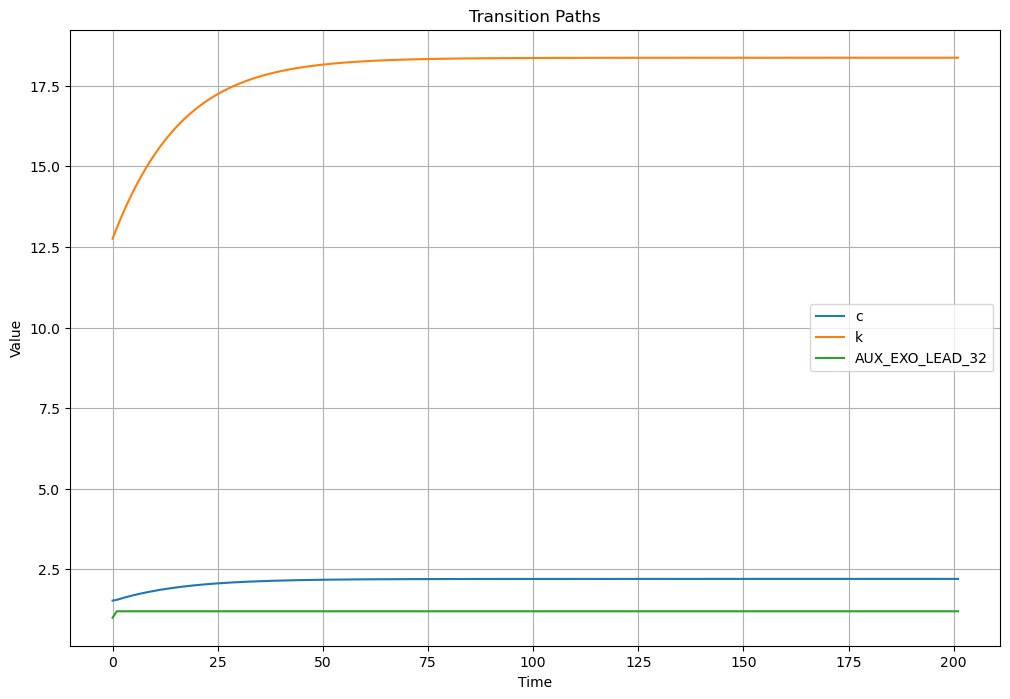


Detailed perfect foresight results not available in oo_ structure


In [33]:
from oct2py import octave
import numpy as np
import matplotlib.pyplot as plt

# Set up Octave session and run your model
oct.dynare('model_simple_example.mod')

# Pull necessary structures
oo_ = oct.pull('oo_')
M_ = oct.pull('M_')

# Get endogenous variable names
endo_names = [name[0] for name in M_['endo_names']]

# For perfect_foresight_solver, results are typically in oo_.endo_simul
endo_simul = oo_['endo_simul']
results = {name: endo_simul[i, :] for i, name in enumerate(endo_names)}

# Print simulation results
print("Perfect Foresight Solution Results:")
for name, values in results.items():
    print(f"{name}:")
    print(f"  Initial value: {values[0]:.6f}")
    print(f"  Final value: {values[-1]:.6f}")
    print(f"  Change: {values[-1] - values[0]:.6f}")

# Access steady state (if available)
if 'steady_state' in oo_:
    steady_state = oo_['steady_state']
    print("\nSteady State:")
    for name, value in zip(endo_names, steady_state):
        print(f"{name}: {value[0]:.6f}")

# Plot transition paths
plt.figure(figsize=(12, 8))
for name in results:
    plt.plot(results[name], label=name)
plt.legend()
plt.title('Transition Paths')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

if 'perfect_foresight' in oo_:
    pf_results = oo_['perfect_foresight']
    print("\nPerfect Foresight Solver Results:")
    print(f"Convergence achieved: {'Yes' if pf_results['status'] == 1 else 'No'}")
    print(f"Number of iterations: {pf_results['iterations']}")
    print(f"Tolerance achieved: {pf_results['error']}")
else:
    print("\nDetailed perfect foresight results not available in oo_ structure")

In [32]:
oo_

{'dynare_version': '6.1',
 'exo_simul': array([[1. ],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2]]),
 'endo_simul': array([[ 1.53061224,  1.58551388,  1.62505546,  1.66282348,  1.69893019,
          1.73349288,  1.76663405,  1.7984817 ,  1.82916983,  1.85883919,
          1.88763826,  1.91572463,  1.94326675,  1.97044614,  1.99746028,
          2.02452616,  2.05188486,  2.07980731,  2.10860177,  2.13862333,
          2.17028648,  2.20408163],
        [12.75510204, 13.05734327, 13.33923787, 13.601005  , 13.84282776,
         14.06483659, 14.26709436, 14.44958098, 14.61217745, 14.75464876,
         14.87662535, 14.97758255, 15.05681735, 15.11342185, 15.14625221,
         15.15389224, 15.1346098 , 15.08630429, 15.00644261, 

In [17]:
from oct2py import octave
import numpy as np

# Set up Octave session and run your model (as before)
oct.dynare('model_simple_example.mod')

# Pull necessary structures
oo_ = oct.pull('oo_')
M_ = oct.pull('M_')

# Get endogenous variable names
endo_names = [name[0] for name in M_['endo_names']]

# Access simulation results
endo_simul = oo_['endo_simul']
results = {name: endo_simul[i, :] for i, name in enumerate(endo_names)}

# Print simulation results
print("Simulation results:")
for name, values in results.items():
    print(f"{name}:")
    print(f"  First 50 periods: {values[:50]}")
    print(f"  Mean: {np.mean(values):.4f}")
    print(f"  Std Dev: {np.std(values):.4f}")

# Access steady state
steady_state = oo_['steady_state']
print("\nSteady State:")
for name, value in zip(endo_names, steady_state):
    print(f"{name}: {value[0]:.6f}")

# Access decision rules (if needed)
dr = oo_['dr']
print("\nEigenvalues:")
print(dr['eigval'])

# You can add more analysis here based on your specific needs

Starting Dynare (version 6.1).
Calling Dynare with arguments: none
Starting preprocessing of the model file ...
Substitution of exo leads: added 1 auxiliary variables and equations.
Found 3 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 2 equation(s)
                                 and 2 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 2 equation(s)
                                 and 2 feedback variable(s).
Preprocessing completed.
Preprocessing time: 0h00m00s.

STEADY-STATE RESULTS:

c               		 1.53061
k               

In [18]:
oo_

{'dynare_version': '6.1',
 'exo_simul': array([[1. ],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
        [1.2],
 

In [ ]:
oo

In [ ]:
mat_contents = scipy.io.loadmat('dynare_results.mat')

In [ ]:
mat_contents


In [ ]:
oo2 = mat_contents['oo_']

In [ ]:
oo_path = mat_contents['oo_']

In [ ]:
oo_path